
<center><img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png">
<h1>Universidad Sergio Arboleda</h1>
<h3>Ciencias de la Computacion e IA
<h4>Modelos Predictivos</h4>
<p>Daniel Alejandro Olarte Ávila</p>
<p>1 de Agosto 2022</p>
<p>Profesor: Camilo Rodriguez</p></center>

In [ ]:
#Se importan los modulos 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from joblib import dump


from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modelos Predictivos/adult.data',
                   header=None,
                   na_values="?",
                   names= ["age","workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", 
                            "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


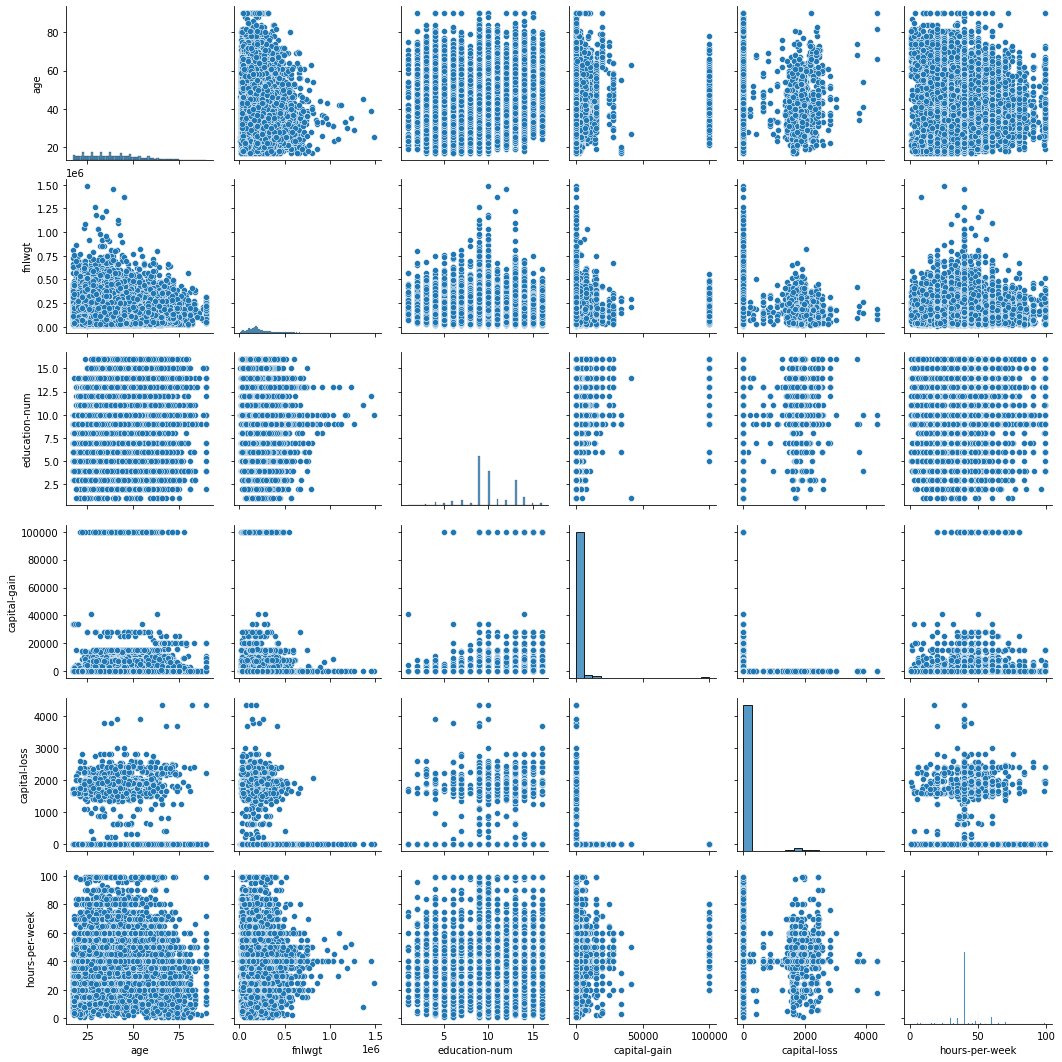

In [ ]:
# Visualizacion grafica de los datos, dispersion par por variables
sns.pairplot(data)

In [ ]:
##Covertir la columna de sex en booleanos si es masculino queda True
#data['sex'] = data['sex'] == ' Male'
##Covertir la columna de salary en booleanos si es <=50K queda True 
#data['salary'] = data['salary'] == ' <=50K'

##Convertir las columnas sex y salary a numeros
data['sex'] = data['sex'].astype('category').cat.codes
data['salary'] = data['salary'].astype('category').cat.codes
data['race'] = data['race'].astype('category')

data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,1


In [ ]:
#Saber la cantidad de registros y columnas que hay en el dataset
data.shape

(32561, 15)

In [ ]:
#Imprime los nombres de las columnas que hay
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
#Se eliminan los valores nulos del dataset
data.dropna(inplace =True)
data.describe()#Se muestra la descripcion del dataset

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
data.info() #Se imprime informacion del dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  category
 9   sex             32561 non-null  int8    
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  object  
 14  salary          32561 non-null  int8    
dtypes: category(1), int64(6), int8(2), object(6)
memory usage: 3.3+ MB


In [ ]:
data.groupby(['sex' ,'salary']).mean() #se mira el promedio teniendo en cuenta el sex y el salary

age         fnlwgt  education-num  capital-gain  \
sex salary                                                          
0   0       36.210801  185999.381359       9.820475    121.986134   
    1       42.125530  183687.406277      11.787108   4200.389313   
1   0       37.147012  193093.609268       9.452142    165.723823   
    1       44.625788  188769.101321      11.580606   3971.765836   

            capital-loss  hours-per-week  
sex salary                                
0   0          47.364470       35.916701  
    1         173.648855       40.426633  
1   0          56.806782       40.693879  
    1         198.780396       46.366106

In [ ]:
data.groupby('salary').describe().T #Se muestra a detalle la columna salary 

salary                           0             1
age            count  2.472000e+04  7.841000e+03
               mean   3.678374e+01  4.424984e+01
               std    1.402009e+01  1.051903e+01
               min    1.700000e+01  1.900000e+01
               25%    2.500000e+01  3.600000e+01
               50%    3.400000e+01  4.400000e+01
               75%    4.600000e+01  5.100000e+01
               max    9.000000e+01  9.000000e+01
fnlwgt         count  2.472000e+04  7.841000e+03
               mean   1.903409e+05  1.880050e+05
               std    1.064823e+05  1.025418e+05
               min    1.228500e+04  1.487800e+04
               25%    1.176060e+05  1.191010e+05
               50%    1.794650e+05  1.761010e+05
               75%    2.390230e+05  2.309590e+05
               max    1.484705e+06  1.226583e+06
education-num  count  2.472000e+04  7.841000e+03
               mean   9.595065e+00  1.161166e+01
               std    2.436147e+00  2.385129e+00
               min    1.000000e+00  2.000000e+00
               25%    9.000000e+00  1.000000e+01
               50%    9.000000e+00  1.200000e+01
               75%    1.000000e+01  1.300000e+01
               max    1.600000e+01  1.600000e+01
sex            count  2.472000e+04  7.841000e+03
               mean   6.119741e-01  8.496365e-01
               std    4.873104e-01  3.574501e-01
               min    0.000000e+00  0.000000e+00
               25%    0.000000e+00  1.000000e+00
               50%    1.000000e+00  1.000000e+00
               75%    1.000000e+00  1.000000e+00
               max    1.000000e+00  1.000000e+00
capital-gain   count  2.472000e+04  7.841000e+03
               mean   1.487525e+02  4.006142e+03
               std    9.631393e+02  1.457038e+04
               min    0.000000e+00  0.000000e+00
               25%    0.000000e+00  0.000000e+00
               50%    0.000000e+00  0.000000e+00
               75%    0.000000e+00  0.000000e+00
               max    4.131000e+04  9.999900e+04
capital-loss   count  2.472000e+04  7.841000e+03
               mean   5.314292e+01  1.950015e+02
               std    3.107558e+02  5.954876e+02
               min    0.000000e+00  0.000000e+00
               25%    0.000000e+00  0.000000e+00
               50%    0.000000e+00  0.000000e+00
               75%    0.000000e+00  0.000000e+00
               max    4.356000e+03  3.683000e+03
hours-per-week count  2.472000e+04  7.841000e+03
               mean   3.884021e+01  4.547303e+01
               std    1.231899e+01  1.101297e+01
               min    1.000000e+00  1.000000e+00
               25%    3.500000e+01  4.000000e+01
               50%    4.000000e+01  4.000000e+01
               75%    4.000000e+01  5.000000e+01
               max    9.900000e+01  9.900000e+01

<function matplotlib.pyplot.show>

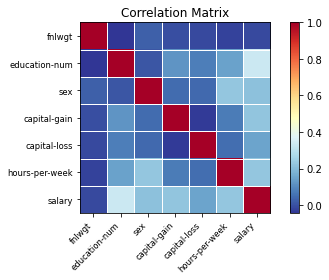

In [ ]:
#Imprimimos la matriz de correlacion para saber cuales son los mejores parametros para compararlos
corr = data.set_index("age").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show

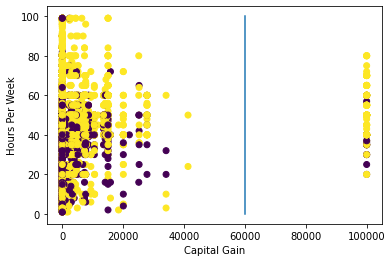

In [ ]:
##Graficamos con Scatter primer parametro: X  Segundo parametro:Y  Tercero los diferencia por colores dependiendo la columna
plt.scatter(data['capital-gain'], data['hours-per-week'], c=data['sex']) 
plt.plot([60000, 60000], [0, 100]) 
plt.xlabel("Capital Gain")
plt.ylabel("Hours Per Week")
plt.show()

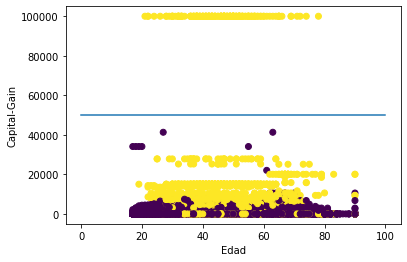

In [ ]:
##Graficamos con Scatter primer parametro: X  Segundo parametro:Y  Tercero los diferencia por colores dependiendo la columna
plt.scatter(data['age'], data['capital-gain'], c=data['salary']) 
plt.plot([0, 100], [50000, 50000])
plt.xlabel("Edad")
plt.ylabel("Capital-Gain")
plt.show()

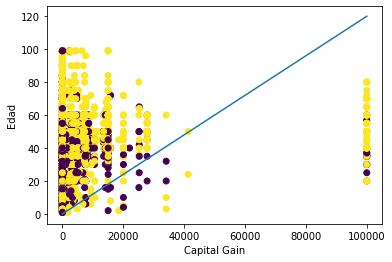

In [ ]:
##Graficamos con Scatter primer parametro: X  Segundo parametro:Y  Tercero los diferencia por colores dependiendo la columna
plt.scatter(data["capital-gain"], data["hours-per-week"], c=data["sex"])
plt.xlabel("Capital Gain")
plt.ylabel("Edad")
plt.plot([0,100000],[0,120]) #Linea manual
plt.show()

In [ ]:
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.1 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


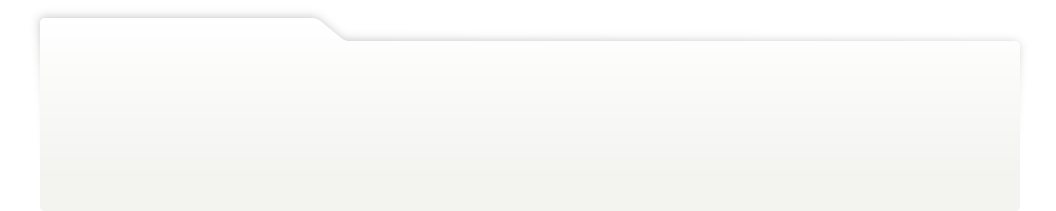
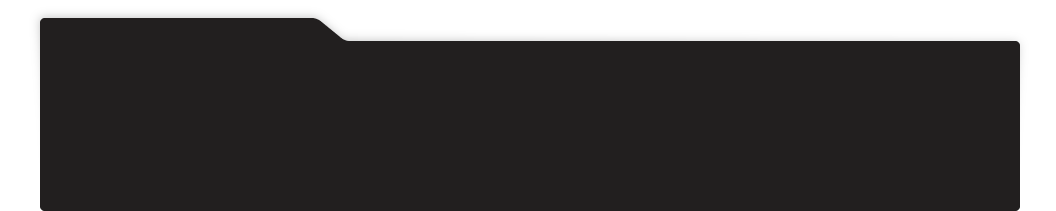
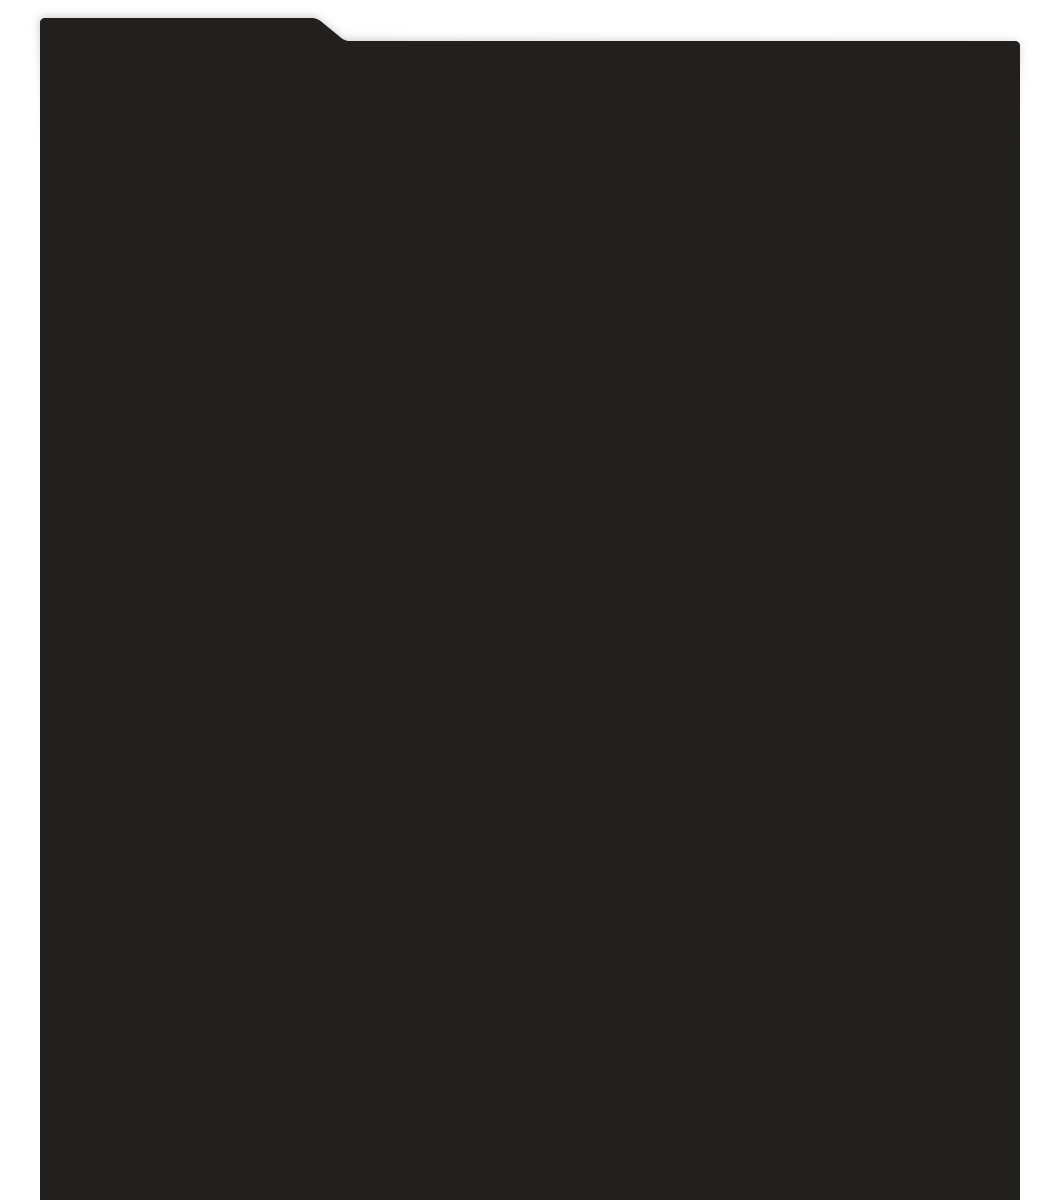
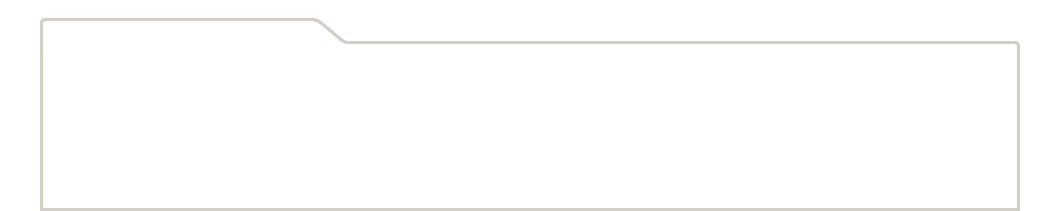
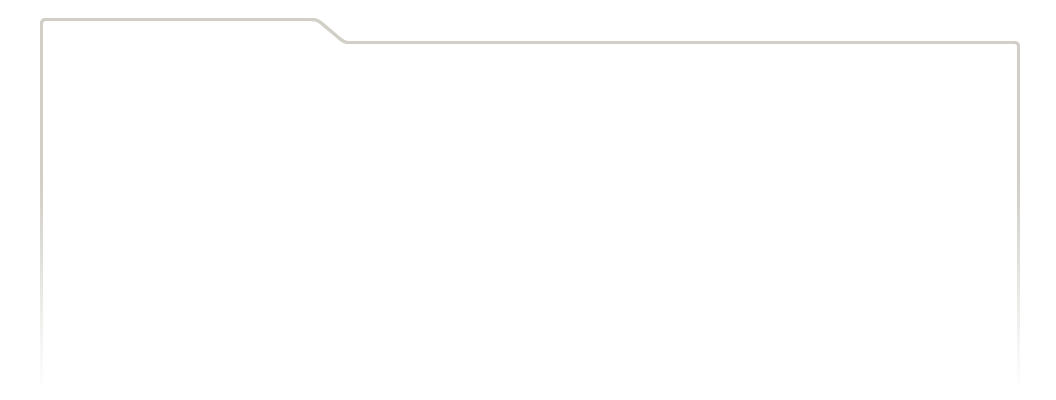
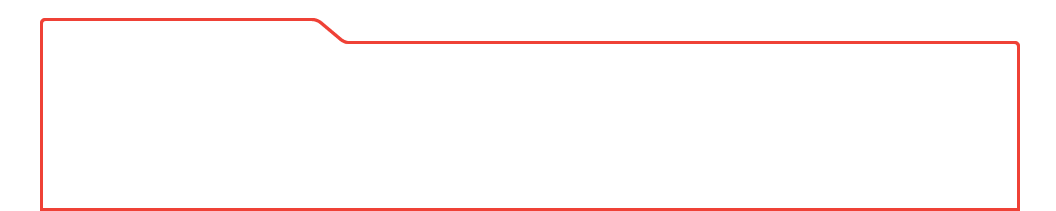
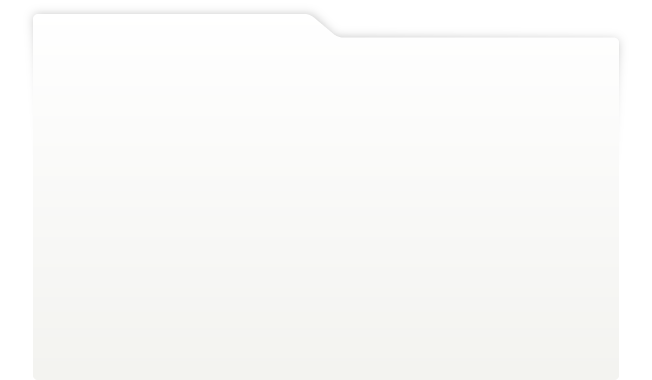
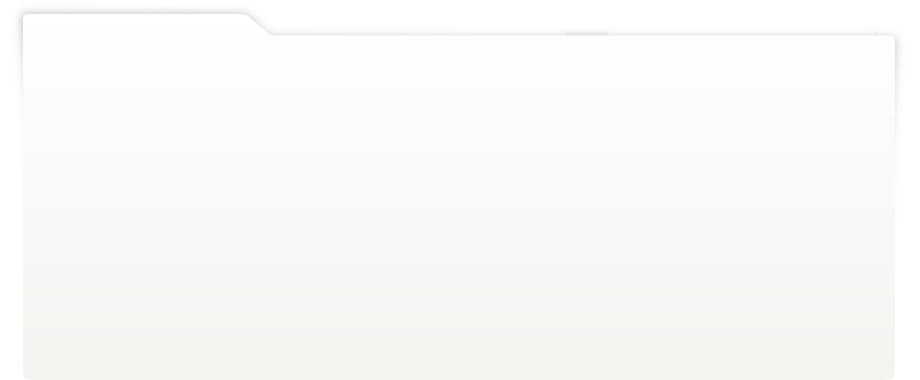
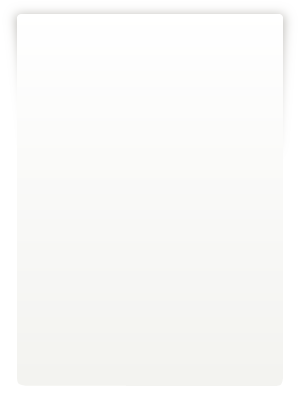
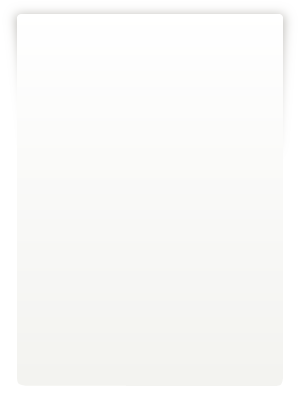
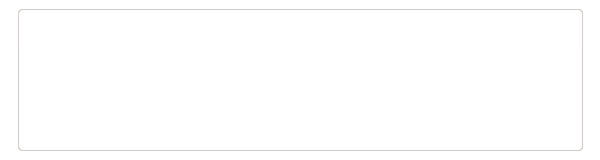
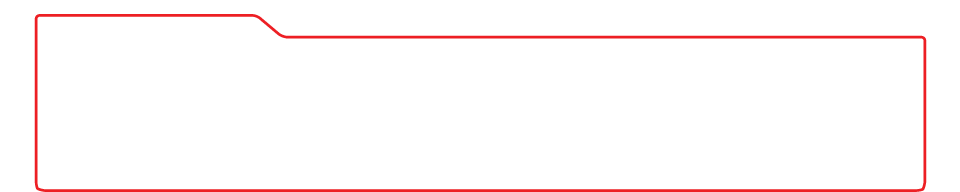
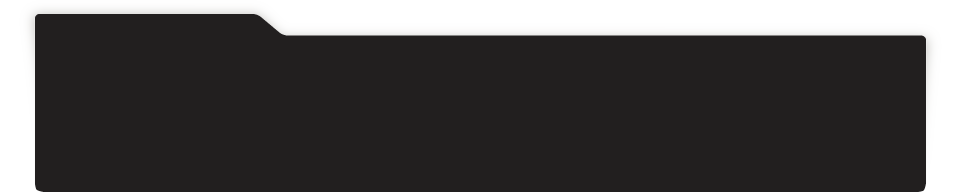
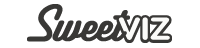
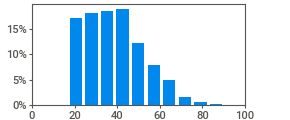
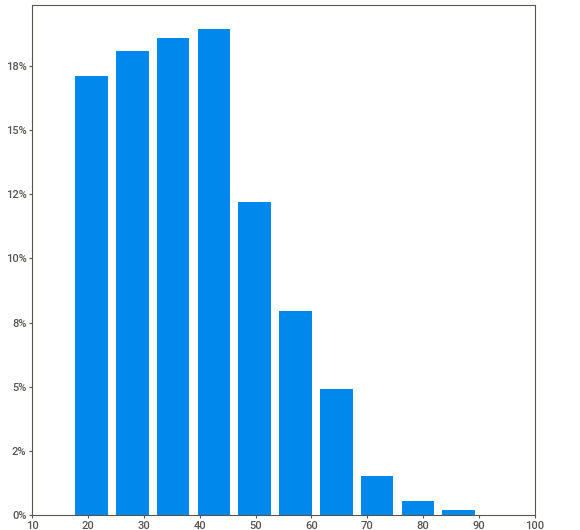
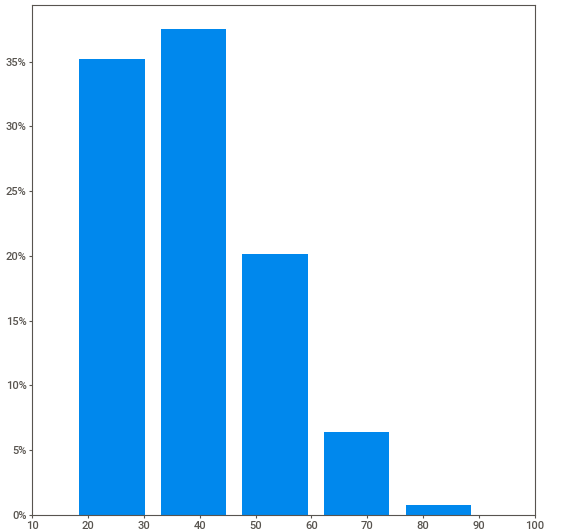
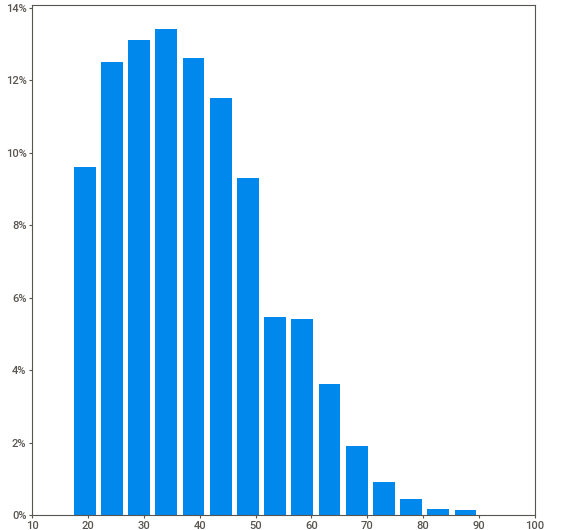
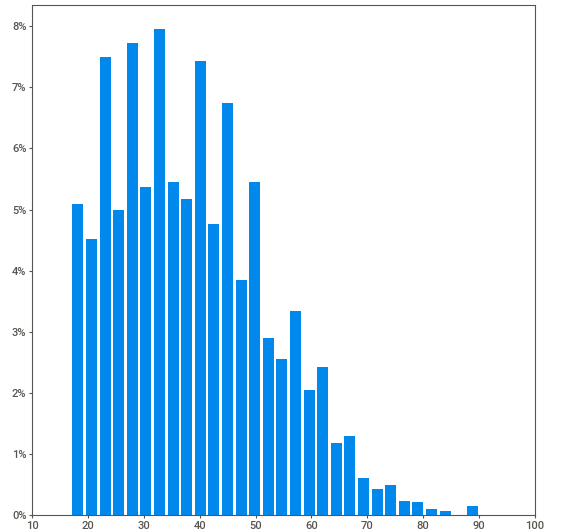
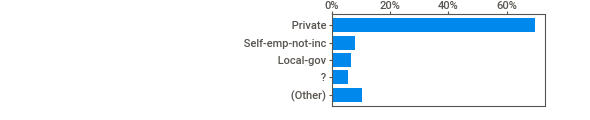
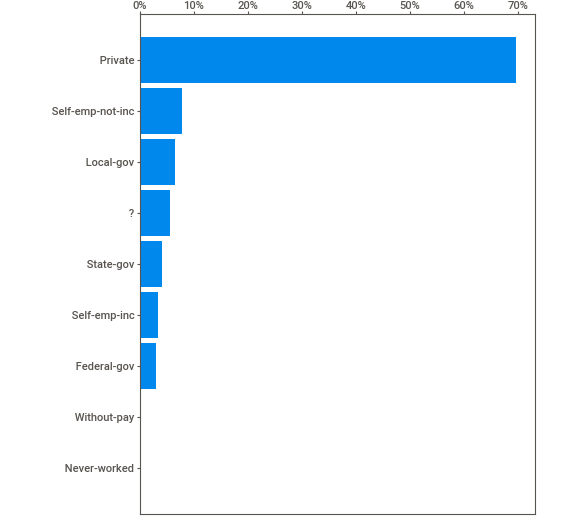
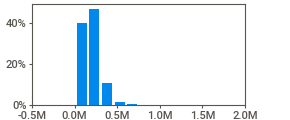
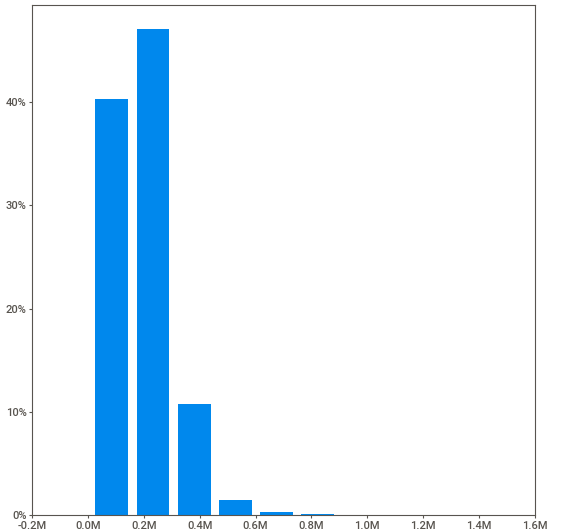
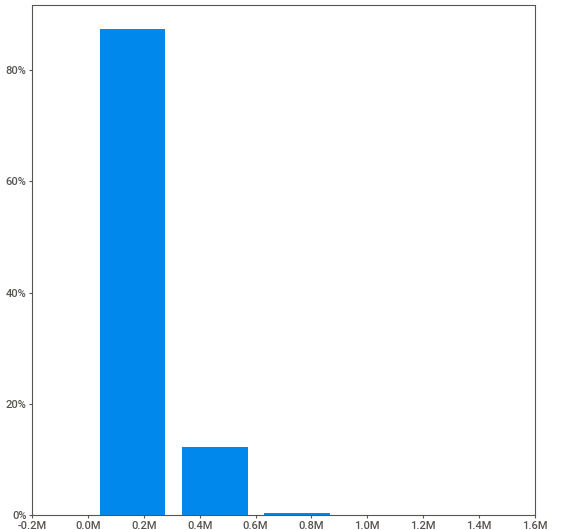
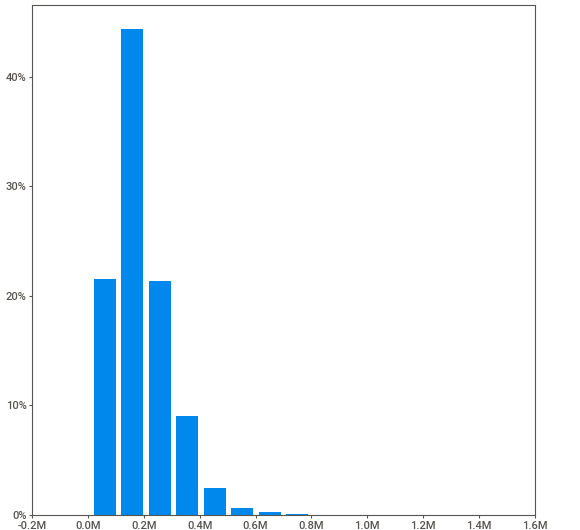
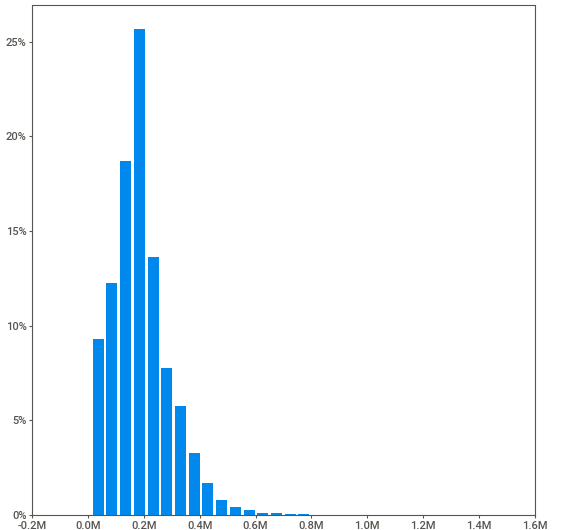
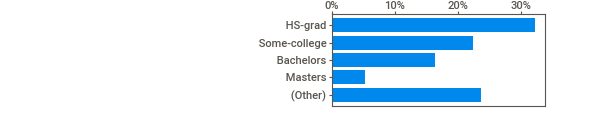
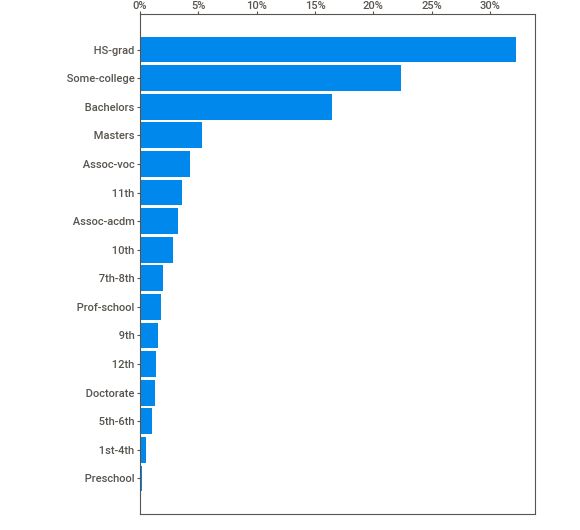
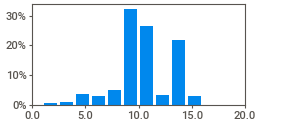
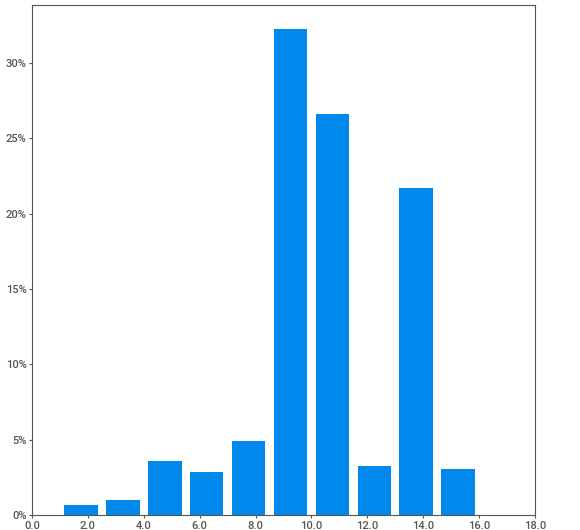
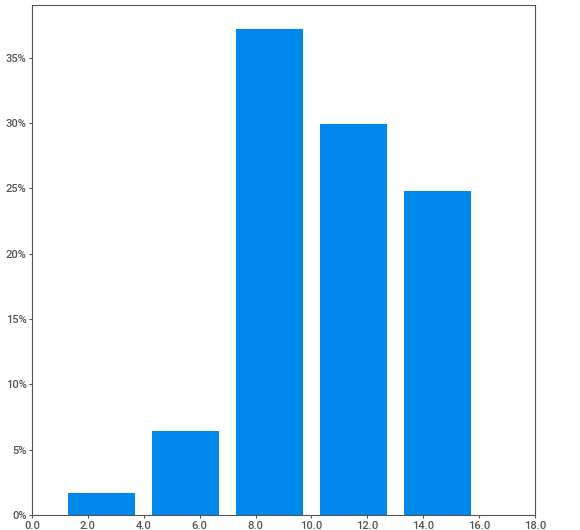
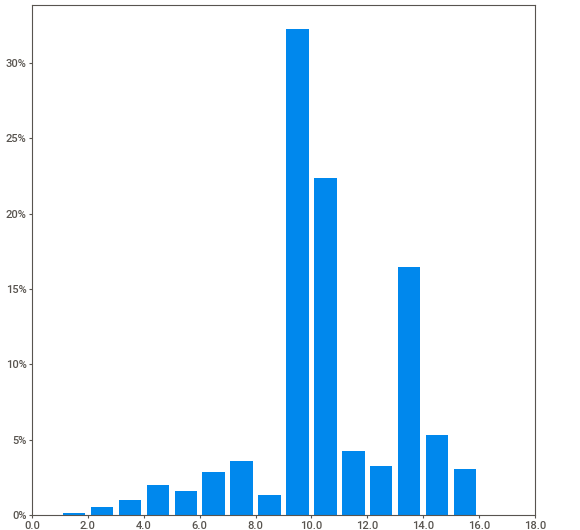
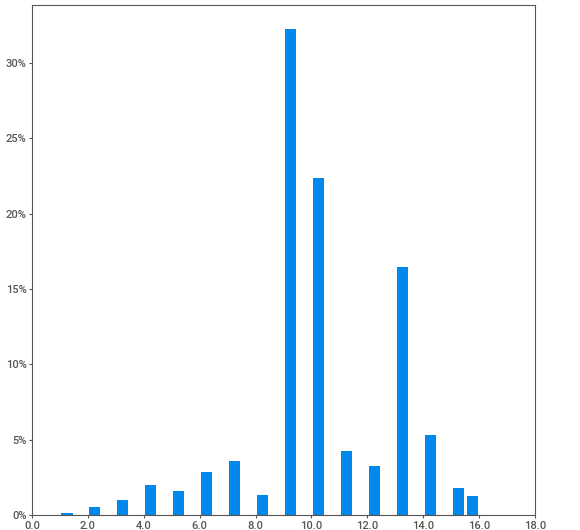
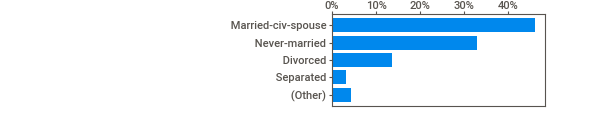
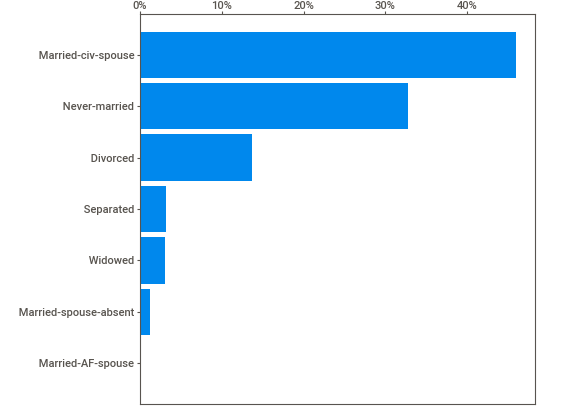
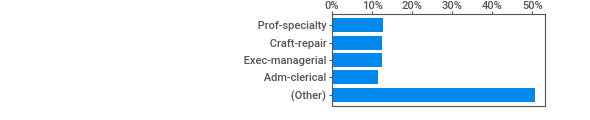
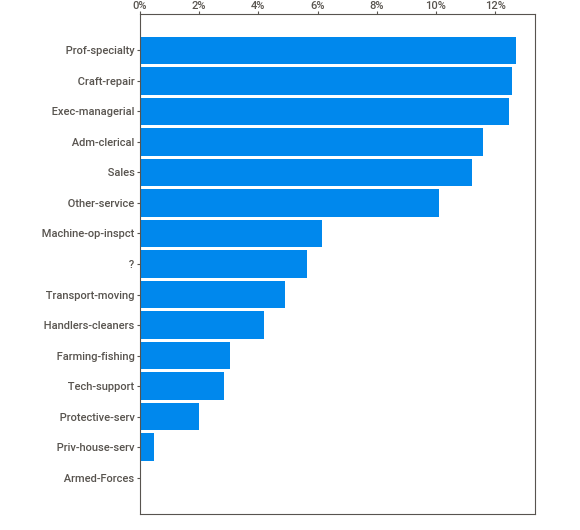
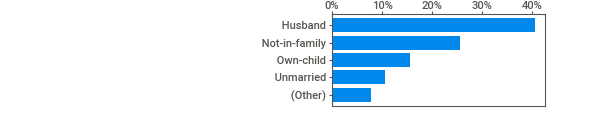
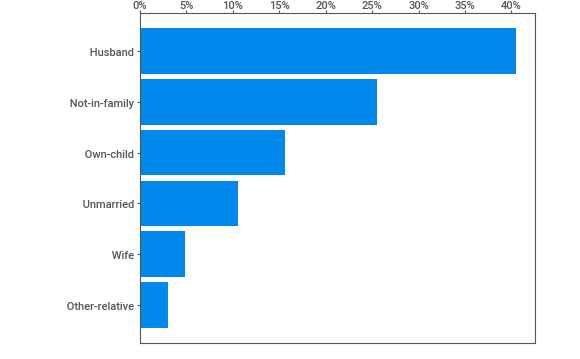
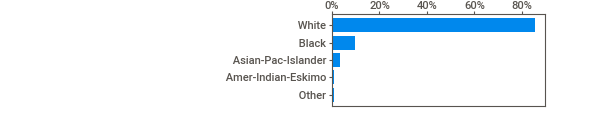
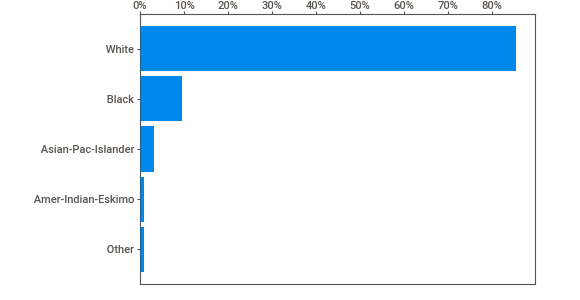
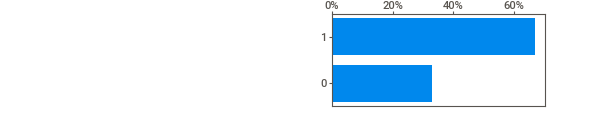
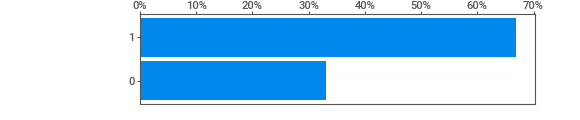
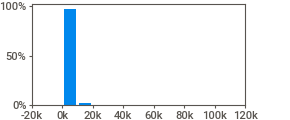
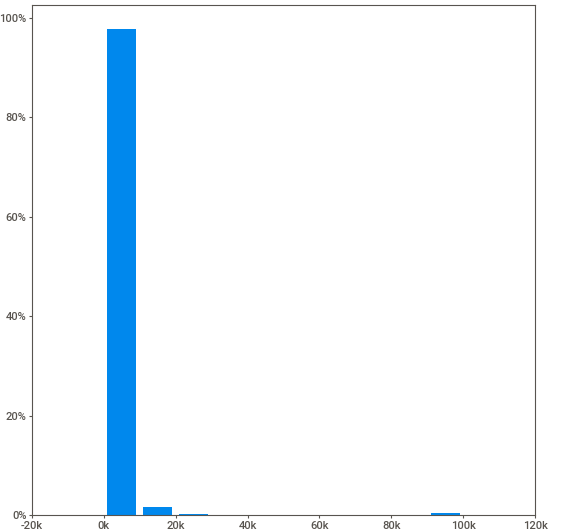
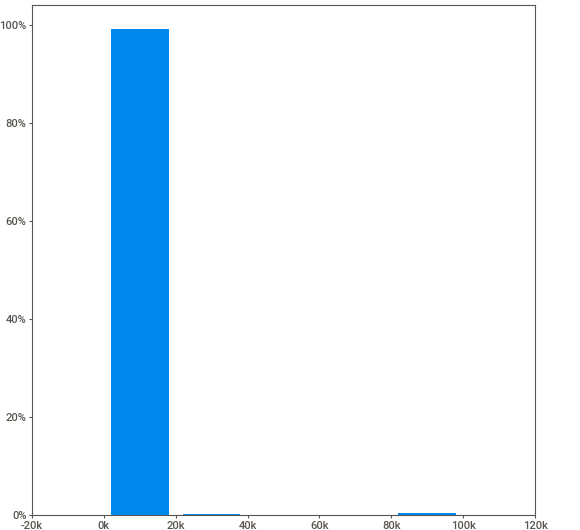
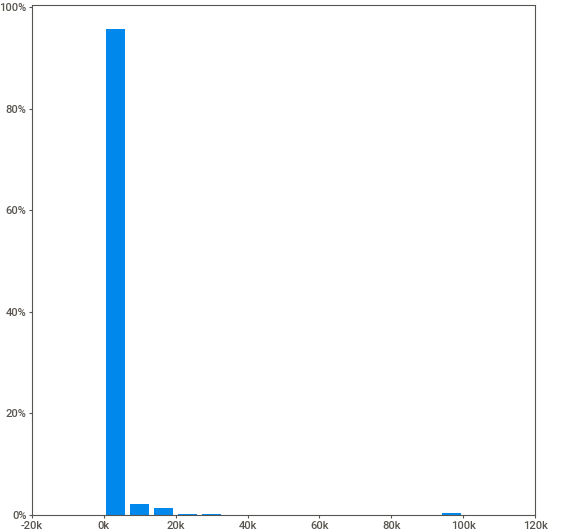
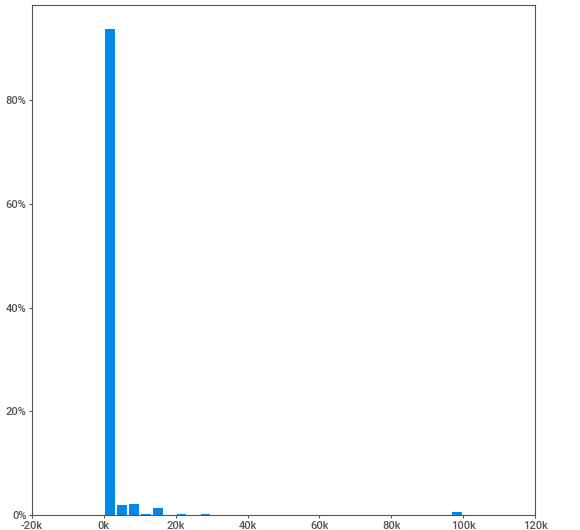
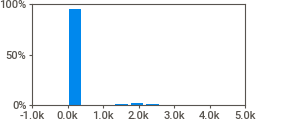
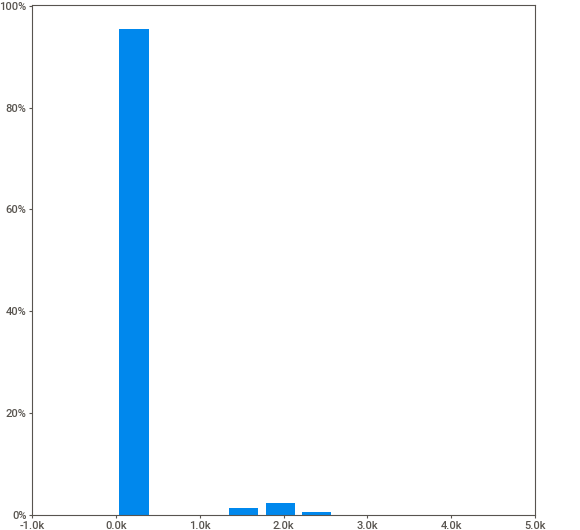
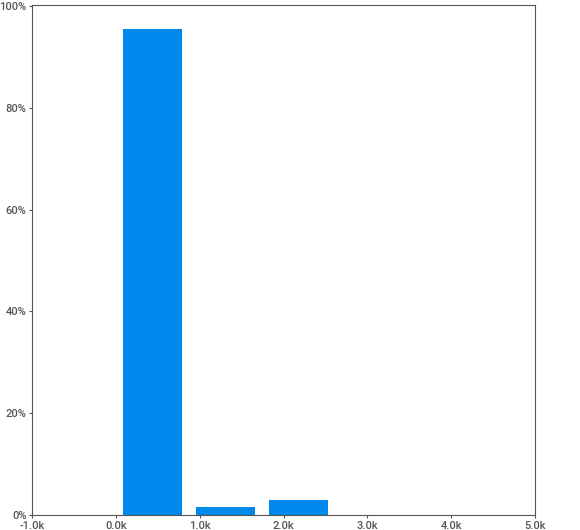
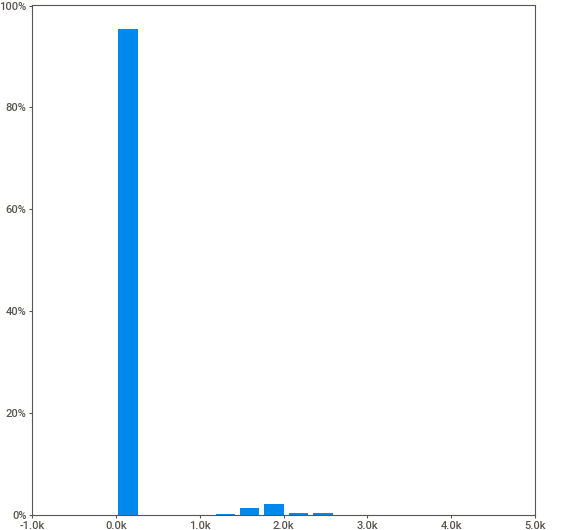
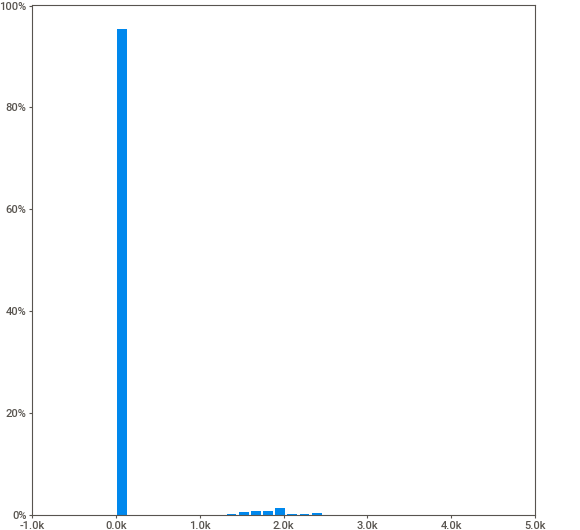
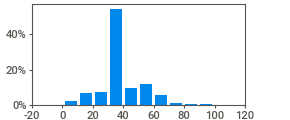
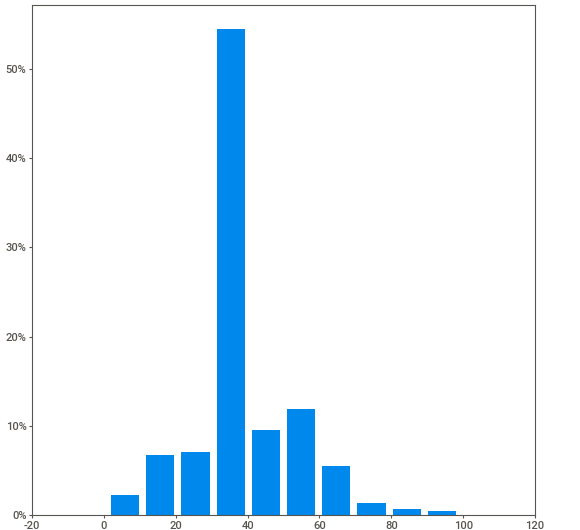
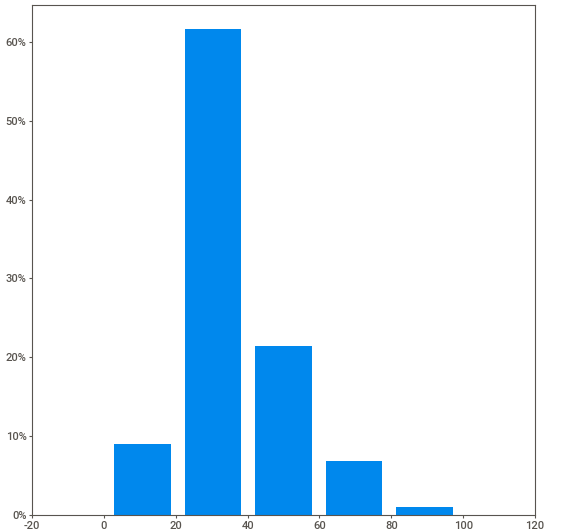
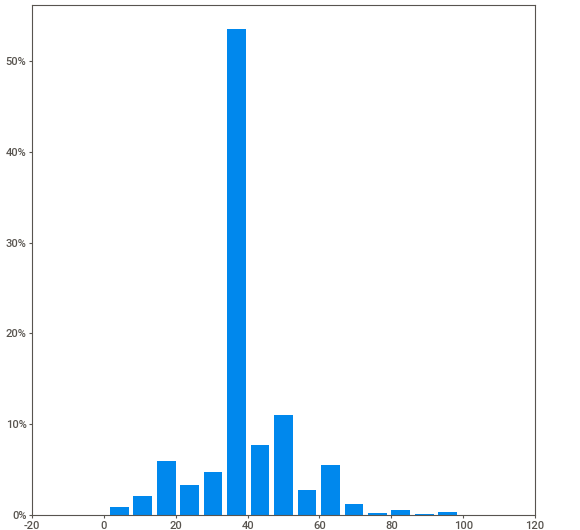
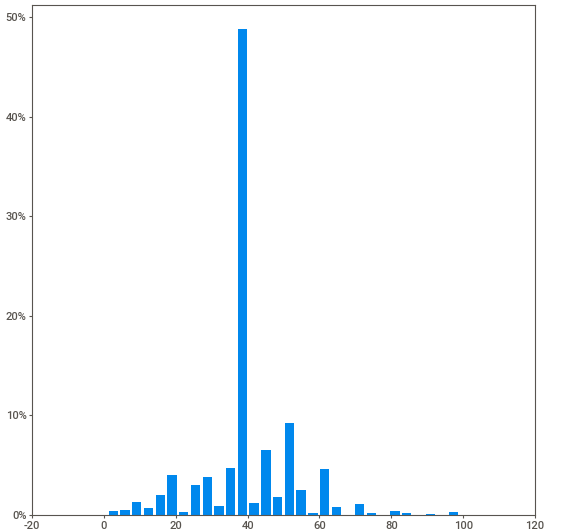
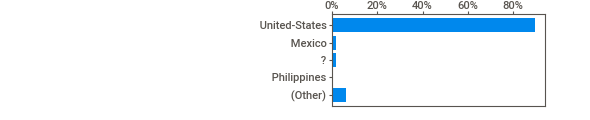
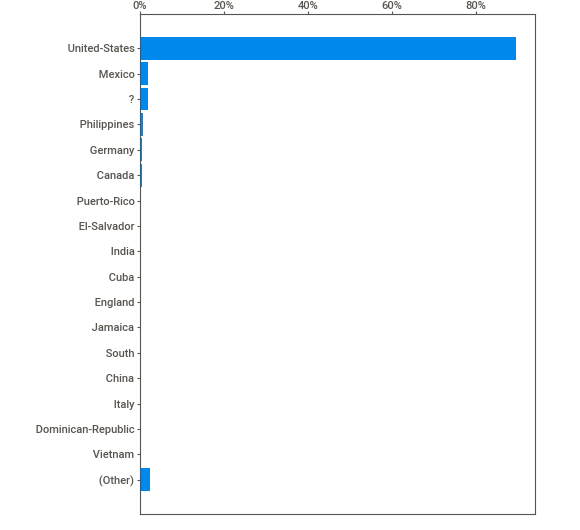
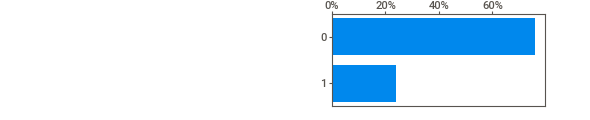
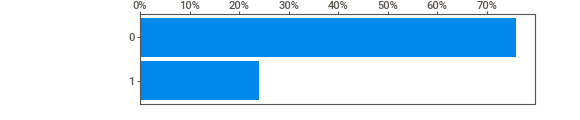
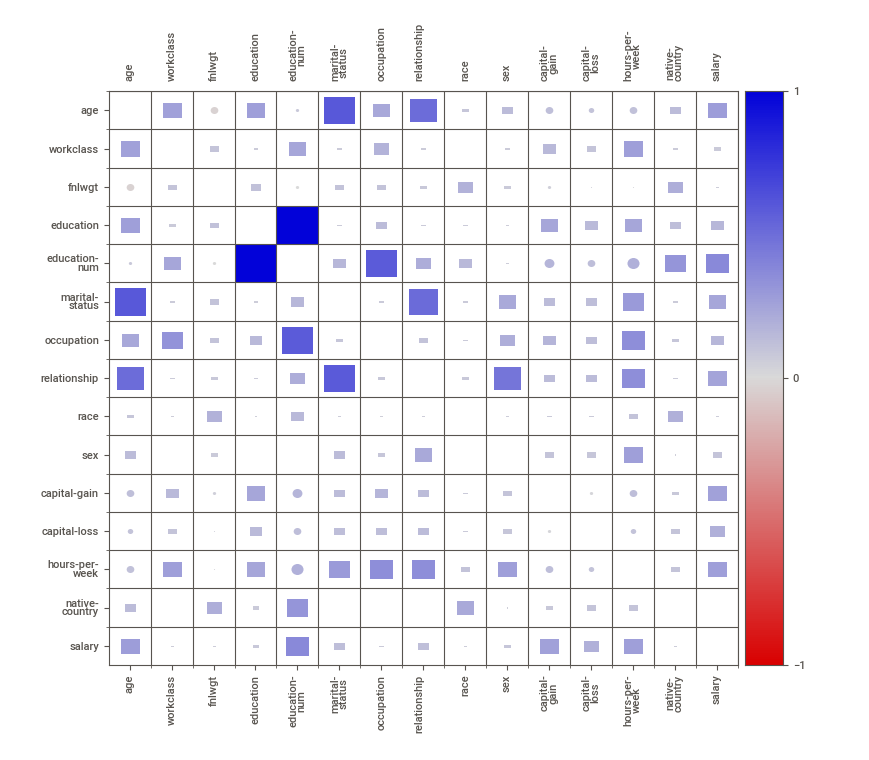
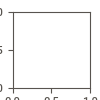

In [ ]:
reporte = sv.analyze(data)
reporte.show_notebook()


In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
train = data.drop(["salary"], axis = 1)
Y_train = data['salary'] 

In [ ]:
##Pipeline
values = {"workclass": train['workclass'].mode()[0], "occupation": train['occupation'].mode()[0], "native-country": train['native-country'].mode()[0]}
train = train.fillna(value=values)
pipeline_numeric = Pipeline([("num_a_num", MinMaxScaler())])
pipeline_categoric_OE = Pipeline([("categorico_a_num", OrdinalEncoder()), ("MinMax", MinMaxScaler())])
columntransformer = ColumnTransformer([("Eliminar", "drop", [3]),
                                      ("Pipeline_numerico", pipeline_numeric, [0,2,4,10,11,12]),
                                      ("Pipeline_numerico_OE", pipeline_categoric_OE, [1,5,6,7,8,9,13])
                                      ])

In [ ]:
columntransformer.fit(train)

ColumnTransformer(transformers=[('Eliminar', 'drop', [3]),
                                ('Pipeline_numerico',
                                 Pipeline(steps=[('num_a_num',
                                                  MinMaxScaler())]),
                                 [0, 2, 4, 10, 11, 12]),
                                ('Pipeline_numerico_OE',
                                 Pipeline(steps=[('categorico_a_num',
                                                  OrdinalEncoder()),
                                                 ('MinMax', MinMaxScaler())]),
                                 [1, 5, 6, 7, 8, 9, 13])])

In [ ]:
X_train = columntransformer.transform(train)

results = cross_validate(LogisticRegression(), X_train, Y_train, scoring=["accuracy"], cv = 10)

In [ ]:
X_train

array([[0.30136986, 0.0443019 , 0.8       , ..., 1.        , 1.        ,
        0.95121951],
       [0.45205479, 0.0482376 , 0.8       , ..., 1.        , 1.        ,
        0.95121951],
       [0.28767123, 0.13811345, 0.53333333, ..., 1.        , 1.        ,
        0.95121951],
       ...,
       [0.56164384, 0.09482688, 0.53333333, ..., 1.        , 0.        ,
        0.95121951],
       [0.06849315, 0.12849934, 0.53333333, ..., 1.        , 1.        ,
        0.95121951],
       [0.47945205, 0.18720338, 0.53333333, ..., 1.        , 0.        ,
        0.95121951]])

In [ ]:
print("Mean: {} \nStd: {}".format(results["test_accuracy"].mean() * 100, results["test_accuracy"].std()*100))

Mean: 82.28556863727266 
Std: 0.49796437875276256


In [ ]:
dump(columntransformer, "RepasoPreprocesamiento.joblib")

['RepasoPreprocesamiento.joblib']